In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cufflinks as cf
cf.go_offline()

In [2]:
dfLE = pd.read_csv('LifeExpectancy.csv')

In [3]:
dfLE.head()

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
0,Afghanistan,60.6,68.2,3.794,4.7
1,Albania,74.8,81.3,4.959,1.7
2,Algeria,73.3,78.9,5.605,2.9
3,Andorra,81.7,84.8,6.955,1.4
4,Angola,58.1,65.6,4.105,5.3


In [4]:
dfSR = pd.read_csv('Suicide Rate.csv')
dfSR.head()

,Country,GDP per capita,Suicide rate
0,Afghanistan,"1,105",20.6
1,Albania,"4,932",32.4
2,Algeria,"4,534",15.6
3,Andorra,"46,622",18.9
4,Angola,"2,077",20.5


In [75]:
dfLE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            142 non-null    object 
 1   Life Expectancy (years) - Men      142 non-null    float64
 2   Life Expectancy (years) - Women    142 non-null    float64
 3   Happiness Score                    142 non-null    float64
 4   Fertility Rate (births per woman)  142 non-null    float64
dtypes: float64(4), object(1)
memory usage: 5.7+ KB


In [76]:
dfSR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         140 non-null    object 
 1   GDP per capita  140 non-null    object 
 2   Suicide rate    140 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.4+ KB


In [5]:
# MERGE on 'inner' to avoid any mismatches

dfN = dfLE.merge(dfSR,how='inner')
dfN.head()

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman),GDP per capita,Suicide rate
0,Afghanistan,60.6,68.2,3.794,4.7,"1,105",20.6
1,Albania,74.8,81.3,4.959,1.7,"4,932",32.4
2,Algeria,73.3,78.9,5.605,2.9,"4,534",15.6
3,Andorra,81.7,84.8,6.955,1.4,"46,622",18.9
4,Angola,58.1,65.6,4.105,5.3,"2,077",20.5


In [6]:
dfN.isnull().sum()

Country                              0
Life Expectancy (years) - Men        0
Life Expectancy (years) - Women      0
Happiness Score                      0
Fertility Rate (births per woman)    0
GDP per capita                       0
Suicide rate                         0
dtype: int64

In [7]:
dfN.columns

Index(['Country', 'Life Expectancy (years) - Men',
       'Life Expectancy (years) - Women', 'Happiness Score',
       'Fertility Rate (births per woman)', 'GDP per capita', 'Suicide rate'],
      dtype='object')

In [8]:
#simplify column names

dfN = dfN.rename(columns={"Life Expectancy (years) - Men":"leMen", "Life Expectancy (years) - Women":"leWm", 
                      "Fertility Rate (births per woman)":"fertilityR","GDP per capita":"GDPpc",
                          "Happiness Score":"happiness",'Suicide rate':'suicide'})
dfN.head()

,Country,leMen,leWm,happiness,fertilityR,GDPpc,suicide
0,Afghanistan,60.6,68.2,3.794,4.7,"1,105",20.6
1,Albania,74.8,81.3,4.959,1.7,"4,932",32.4
2,Algeria,73.3,78.9,5.605,2.9,"4,534",15.6
3,Andorra,81.7,84.8,6.955,1.4,"46,622",18.9
4,Angola,58.1,65.6,4.105,5.3,"2,077",20.5


In [9]:
# GDP per capita column is a problem for us
type("GDPpc")

str

In [10]:
# convert string values to integers

arr1 = []

for x in dfN["GDPpc"]:
    arr1.append( int( x.replace(",","") ) )
    
dfN["GDPpc"] = arr1
dfN.head()

,Country,leMen,leWm,happiness,fertilityR,GDPpc,suicide
0,Afghanistan,60.6,68.2,3.794,4.7,1105,20.6
1,Albania,74.8,81.3,4.959,1.7,4932,32.4
2,Algeria,73.3,78.9,5.605,2.9,4534,15.6
3,Andorra,81.7,84.8,6.955,1.4,46622,18.9
4,Angola,58.1,65.6,4.105,5.3,2077,20.5


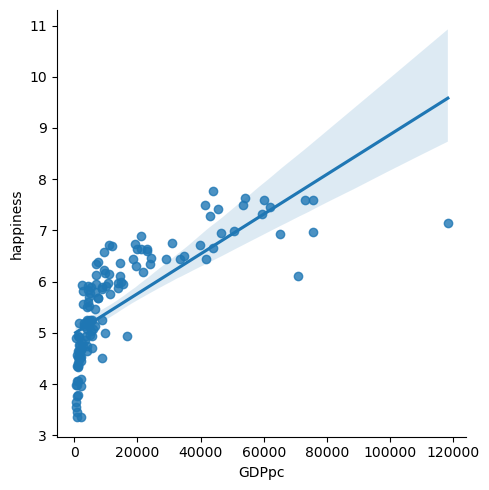

In [11]:
# wealth - happiness relation

sns.lmplot(x="GDPpc",y="happiness",data=dfN,markers="o")

In [14]:
# wealth - fertility rate relation

dfN.iplot(x='happiness', y='fertilityR', kind='scatter',mode='markers', bestfit=True,bestfit_colors=['blue'])

In [15]:
#check stats of our features
dfN.describe()

,leMen,leWm,happiness,fertilityR,GDPpc,suicide
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,71.946970,76.862879,5.579591,2.787121,15267.136364,15.846970
std,6.825686,6.324862,1.081534,1.396036,20845.448772,5.450589
min,52.900000,55.600000,3.351000,1.300000,463.000000,9.600000
25%,66.650000,72.000000,4.731000,1.700000,2161.750000,12.500000
50%,73.400000,78.300000,5.642000,2.300000,5811.500000,14.350000
75%,76.425000,81.500000,6.441250,3.425000,19373.250000,17.600000
max,84.000000,89.500000,7.769000,7.600000,118287.000000,39.700000


In [16]:
# curious about the stats of my favorite

dfN[dfN['Country']=='Austria']

,Country,leMen,leWm,happiness,fertilityR,GDPpc,suicide
9,Austria,81.2,84.2,7.456,1.5,61906,11.5


<AxesSubplot:xlabel='leMen', ylabel='Count'>

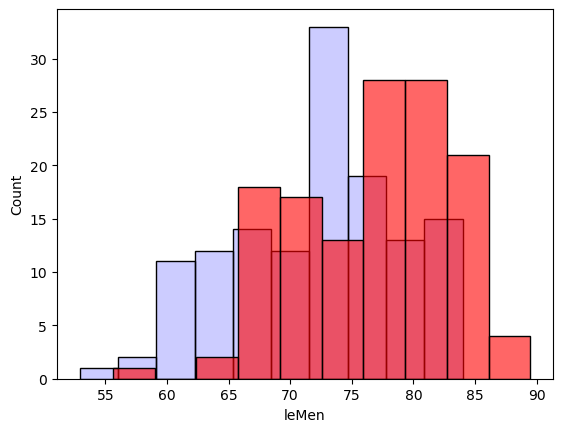

In [17]:
# compare life expectancy of men vs women

sns.histplot(dfN.leMen,bins=10, color='blue',alpha=0.2)
sns.histplot(dfN.leWm, bins=10, color='red', alpha=0.6)

In [18]:
# wealth-suicide rate relation
dfN.iplot(kind='scatter', x='GDPpc', y='suicide',mode='markers', bestfit=True, bestfit_colors=['blue'])

<AxesSubplot:>

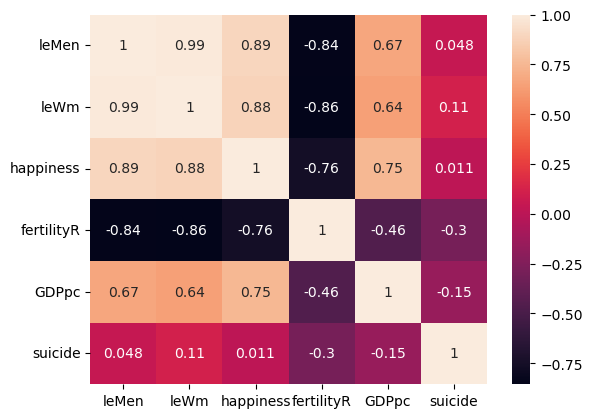

In [131]:
# relation between features of our table

sns.heatmap(dfN.corr(),annot=True)

In [19]:
X = dfN[['GDPpc','happiness']]
y = dfN['suicide']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [21]:
prediction = lm.predict(X_test)
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test,prediction))
RMSE

4.301499866256551

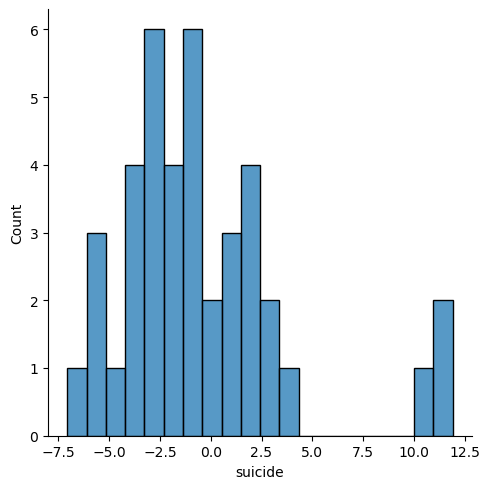

In [33]:
# see that our distribution is not a healthy one, we are a bit off mark
sns.displot((y_test-prediction),bins=20)

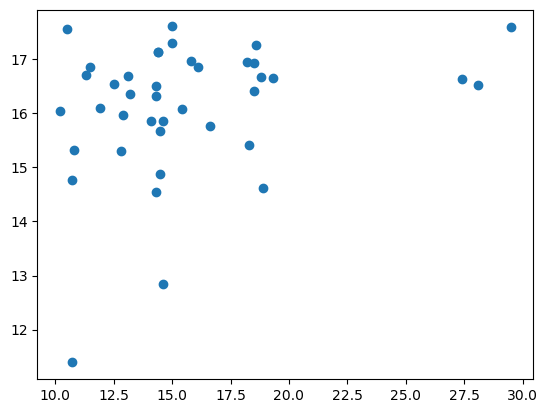

In [34]:
# seems like our regression failed
plt.scatter(y_test,prediction)